In [1]:
import pandas as pd

#### Load data and filter columns with too many empty values

In [2]:
dfCore = pd.read_csv('https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/Chemical_descriptors.csv', usecols=[2,5,6] + list(range(10,218)), index_col=0)
df1515 = pd.read_csv("https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/Chemical_descriptors1515.csv", usecols=[2,5,6] + list(range (10,218)), index_col=0)
dfNetwork = pd.read_csv("https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/Chemical_descriptors1515.csv")

In [3]:
# remove all columns that have less than 90% of non-zero entries
dfCore = dfCore.loc[:,((dfCore != 0).sum() > dfCore.shape[0] * 0.9)]
df1515 = df1515.loc[:,((df1515 !=0).sum() >df1515.shape[0]*0.9 )]


## Remove NANs in df1515 with 0's 

In [4]:
import numpy as np

# df1515.replace(np.nan, 0) # fml

df1515["BCUT2D_MWHI"] = df1515["BCUT2D_MWHI"].replace(np.nan, 0)

df1515["BCUT2D_MWLOW"] = df1515["BCUT2D_MWLOW"].replace(np.nan, 0)

df1515["BCUT2D_CHGHI"] = df1515["BCUT2D_CHGHI"].replace(np.nan, 0)

df1515["BCUT2D_LOGPHI"] = df1515["BCUT2D_LOGPHI"].replace(np.nan, 0)

df1515["BCUT2D_LOGPLOW"] = df1515["BCUT2D_LOGPLOW"].replace(np.nan, 0)

df1515["BCUT2D_CHGLO"] = df1515["BCUT2D_CHGLO"].replace(np.nan, 0)

df1515["BCUT2D_MRHI"] = df1515["BCUT2D_MRHI"].replace(np.nan, 0)

df1515["BCUT2D_MRLOW"] = df1515["BCUT2D_MRLOW"].replace(np.nan, 0)

df1515["MaxPartialCharge"] = df1515["MaxPartialCharge"].replace(np.nan, 0)

df1515["MinPartialCharge"] = df1515["MinPartialCharge"].replace(np.nan, 0)

df1515["MaxAbsPartialCharge"] = df1515["MaxAbsPartialCharge"].replace(np.nan, 0)

df1515["MinAbsPartialCharge"] = df1515["MinAbsPartialCharge"].replace(np.nan, 0)

In [5]:
#df.sample(5)
#df1515.sample(5)

#### Analyse the distribution of values for each descriptor

In [6]:
import matplotlib.pyplot as plt

## Plot e.coli core metabolite feature distributions


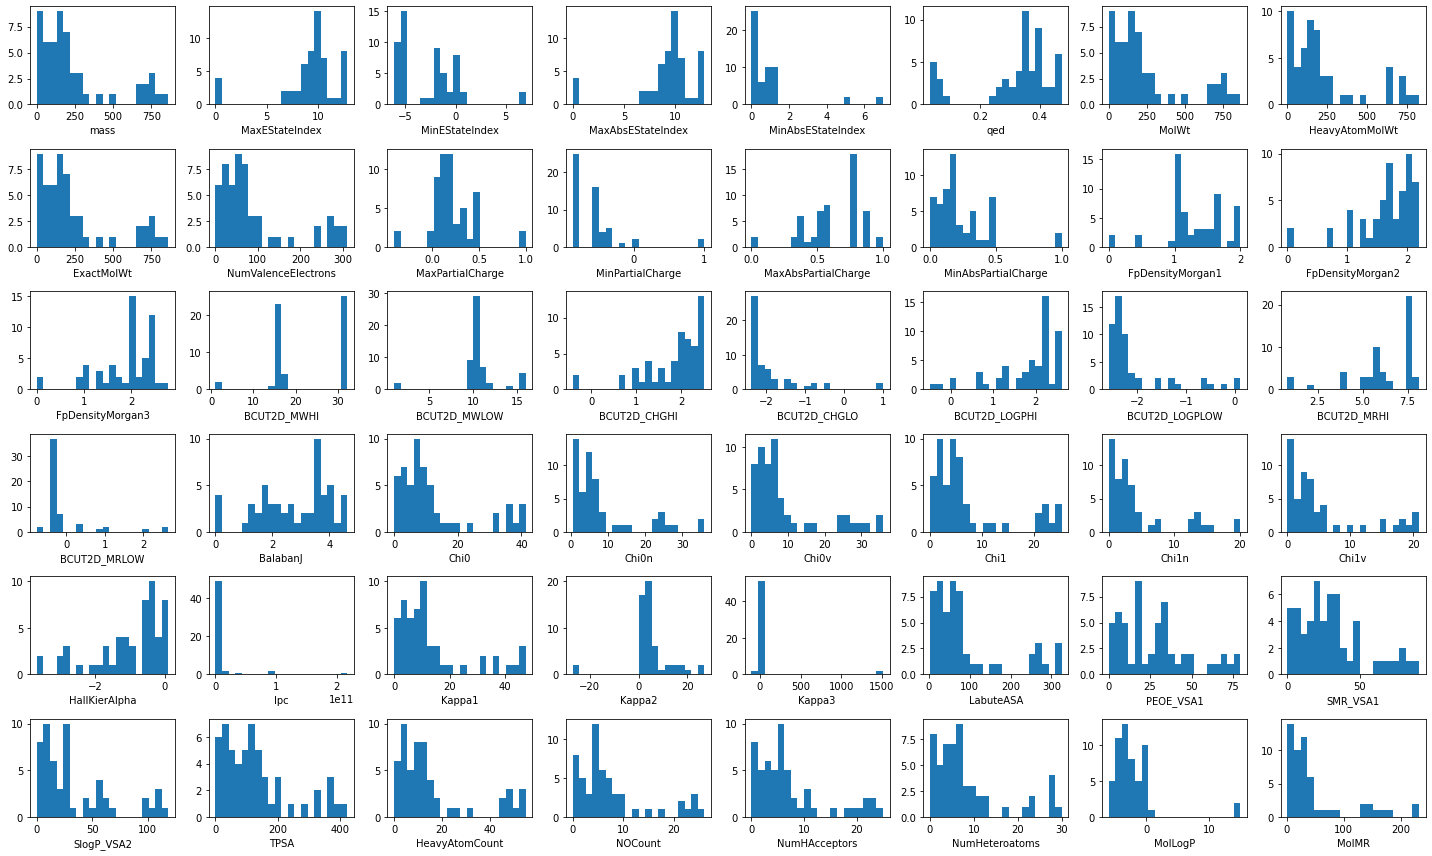

In [7]:
f, axs = plt.subplots(6, 8, figsize=(20, 12))
axs = axs.flatten()

for i in range(48):
    dfCore.iloc[:,i].plot.hist(ax=axs[i], bins=20)
    axs[i].set_xlabel(dfCore.columns[i])
    axs[i].set_ylabel('')
    
f.tight_layout()

## Plot e.coli iML1515 metabolite feature distributions

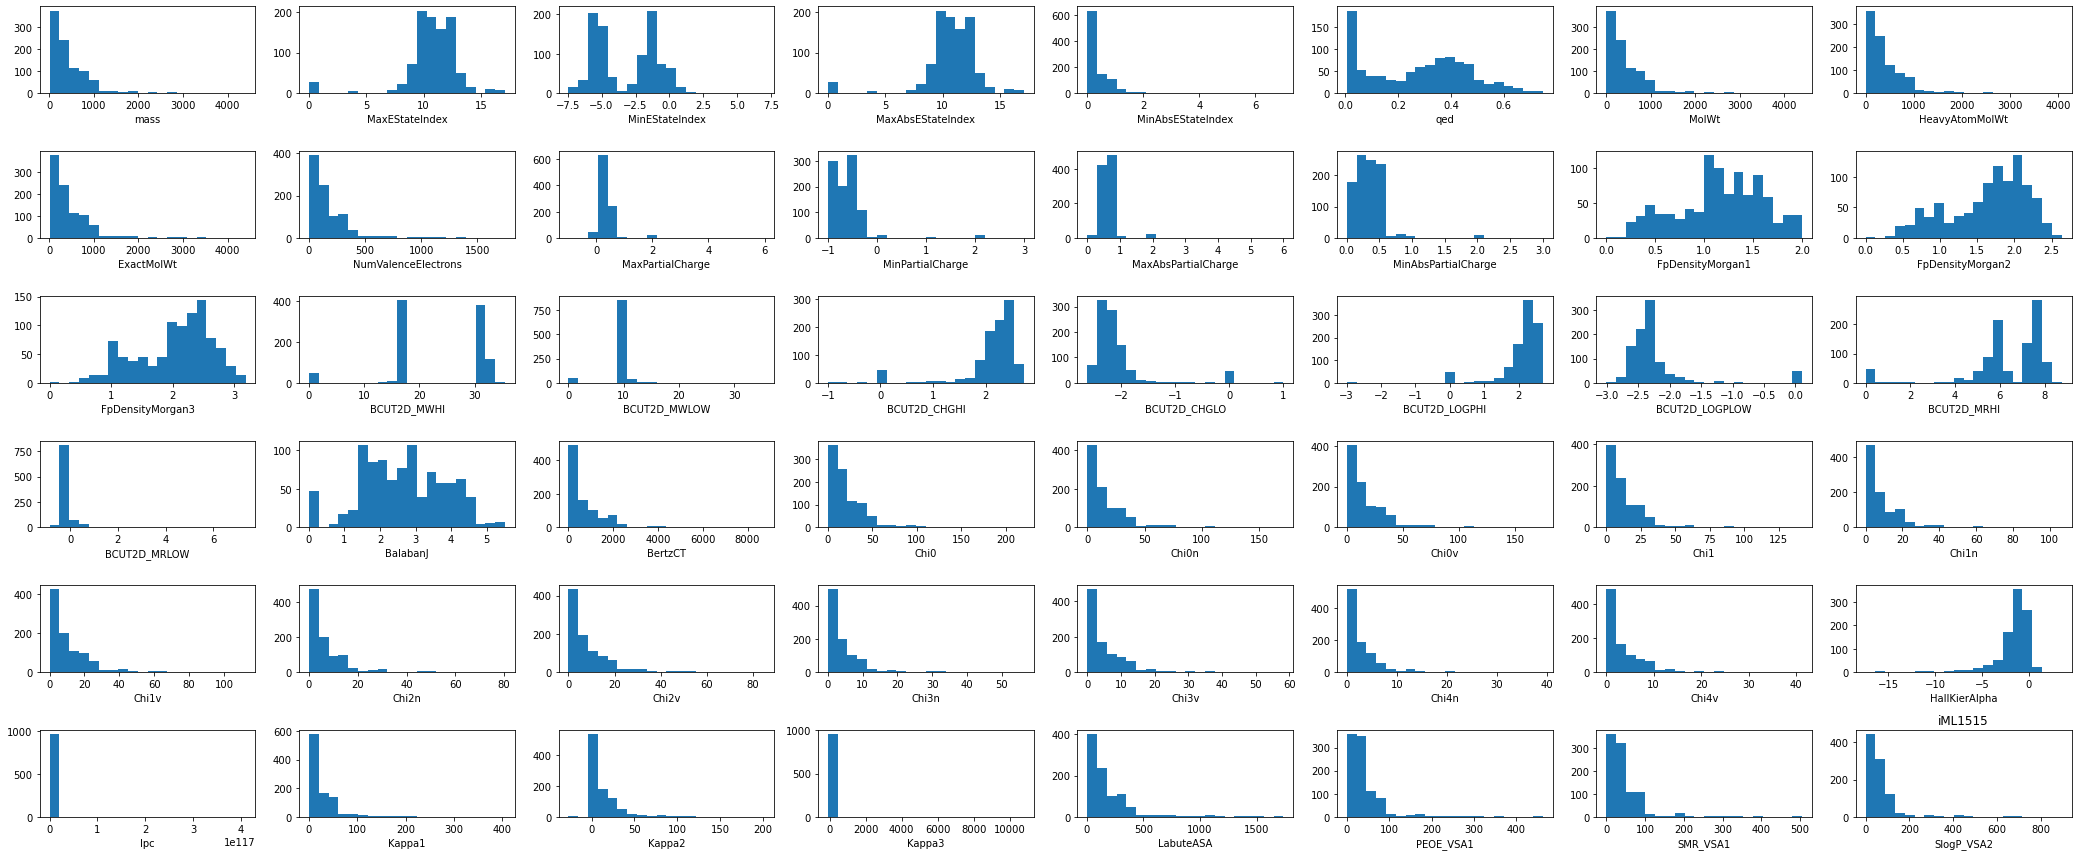

In [8]:
f, axs = plt.subplots(6, 8, figsize=(29, 12))
axs = axs.flatten()
title = plt.title("iML1515", loc ="center")

for i in range(48):
    df1515.iloc[:,i].plot.hist(ax=axs[i], bins=20)
    axs[i].set_xlabel(df1515.columns[i])
    axs[i].set_ylabel('')
    
f.tight_layout()

#### Estimate Spearman correlation between all pairs of descriptors

In [9]:
from scipy.stats import spearmanr
correlation = [(d1, d2, spearmanr(dfCore.loc[:,d1], dfCore.loc[:,d2])[0]) for d1 in dfCore.columns for d2 in dfCore.columns]
correlation1515 = [(d1_1515, d2_1515, spearmanr(df1515.loc[:,d1_1515], df1515.loc[:,d2_1515])[0]) for d1_1515 in df1515.columns for d2_1515 in df1515.columns]


In [10]:
dfCore_2 = pd.DataFrame(correlation, columns=['d1', 'd2', 'value'])
df1515_2 = pd.DataFrame(correlation1515, columns =["d1_1515", "d2_1515","value1515"])


In [11]:
dfCore_3 = dfCore_2.pivot_table(index='d1', columns='d2', values='value')
df1515_3 = df1515_2.pivot_table(index ="d1_1515", columns = "d2_1515", values = "value1515")


In [12]:
import seaborn as sns

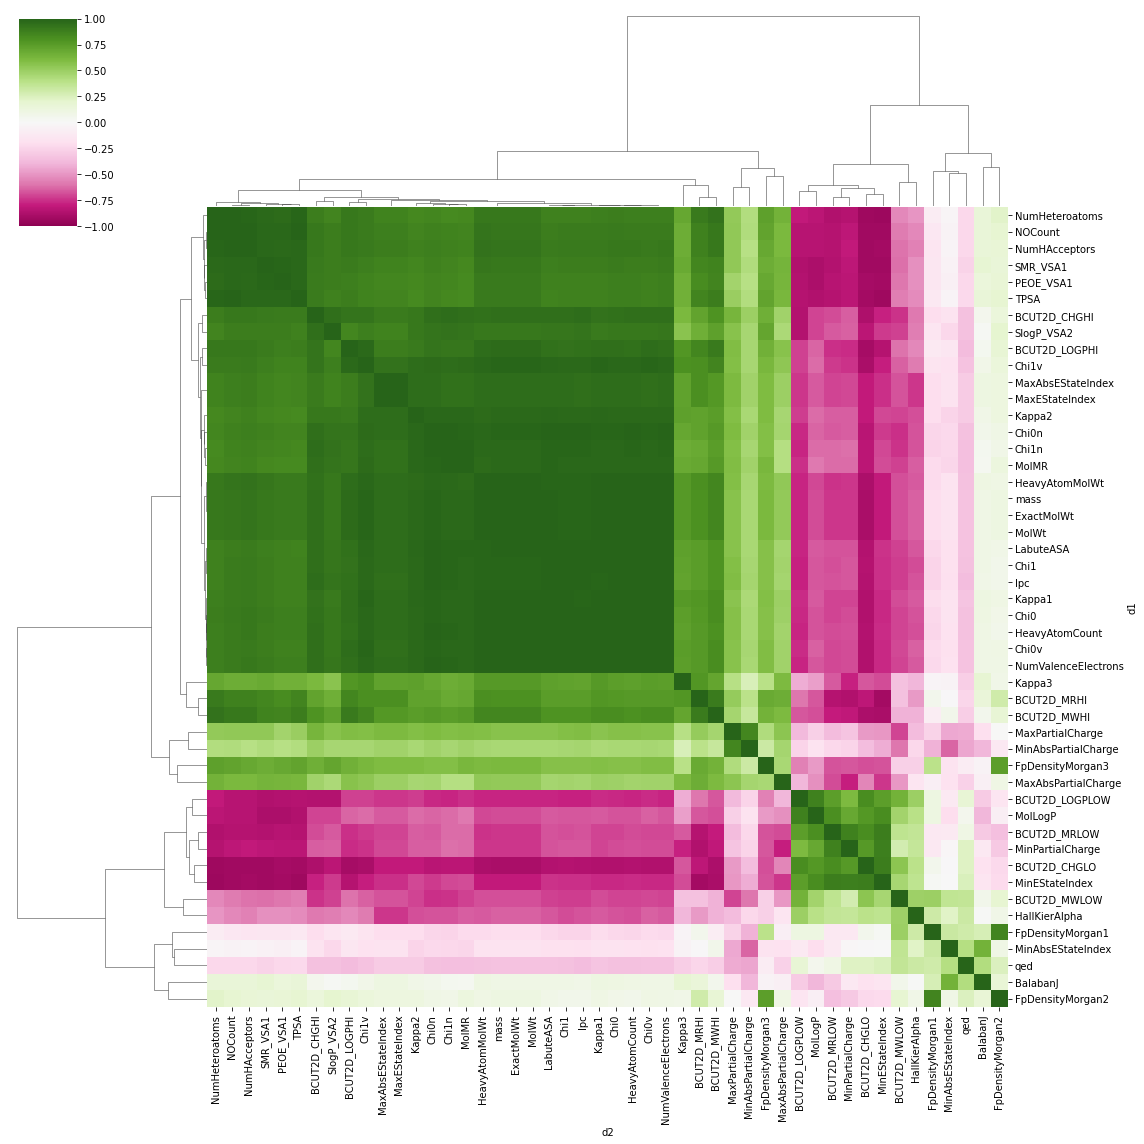

In [13]:
sns.clustermap(dfCore_3, vmin=-1, vmax=1, cmap='PiYG', figsize=(16,16))

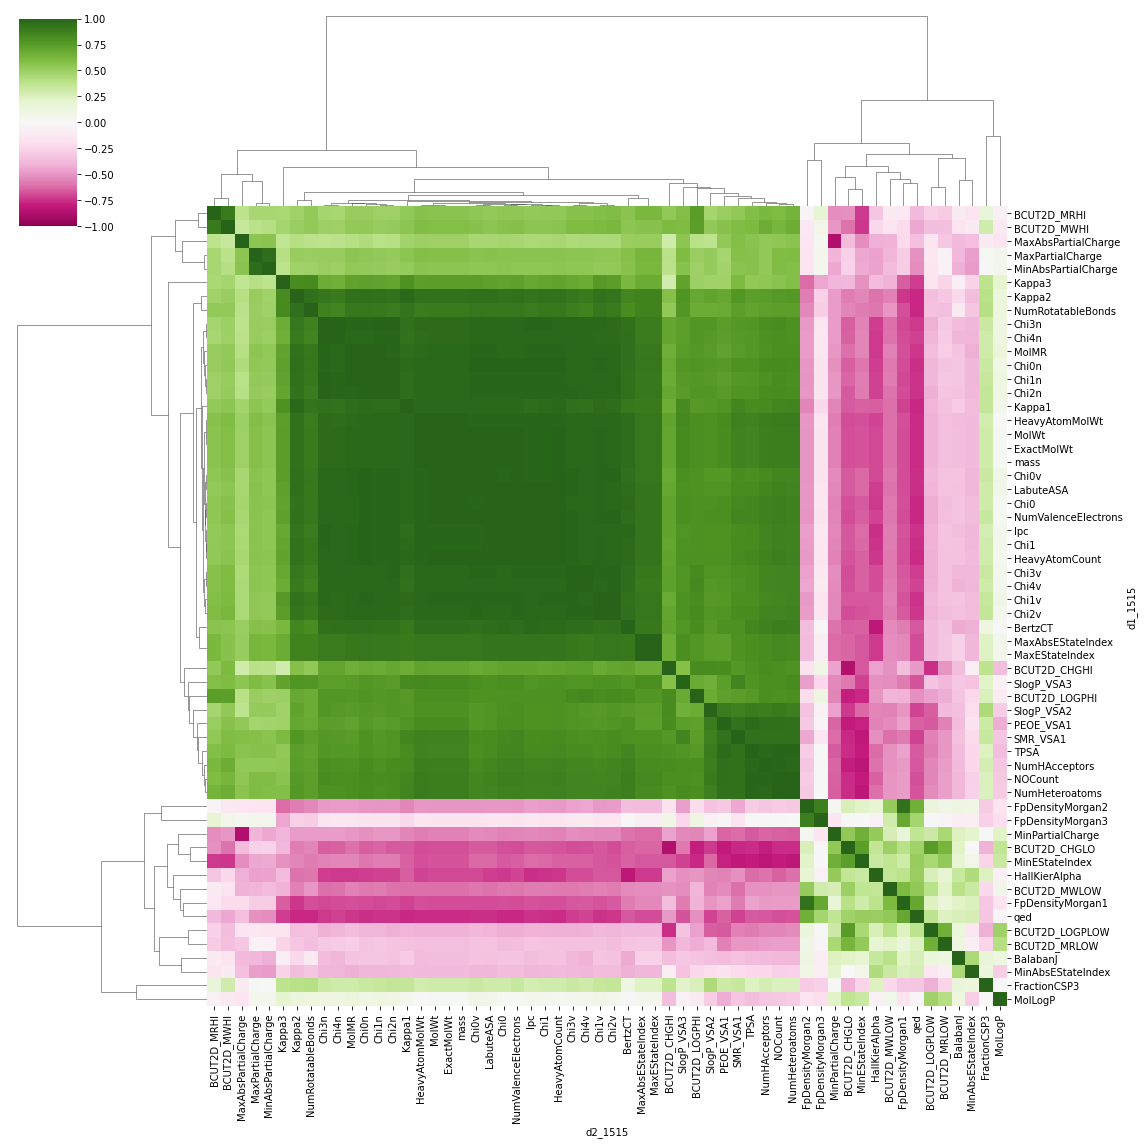

In [14]:
sns.clustermap(df1515_3, vmin=-1, vmax=1, cmap='PiYG', figsize=(16,16))

#### Do scatter plots for pairs of features with low correlation

In [15]:
lowest = dfCore_2.query("abs(value) < 0.1 and d1 < d2")  # d1 < d2 is just to avoid plotting (a,b) and (b,a)
lowest_1515 = df1515_2.query("abs(value1515) < 0.1 and d1_1515 < d2_1515")  # d1 < d2 is just to avoid plotting (a,b) and (b,a)

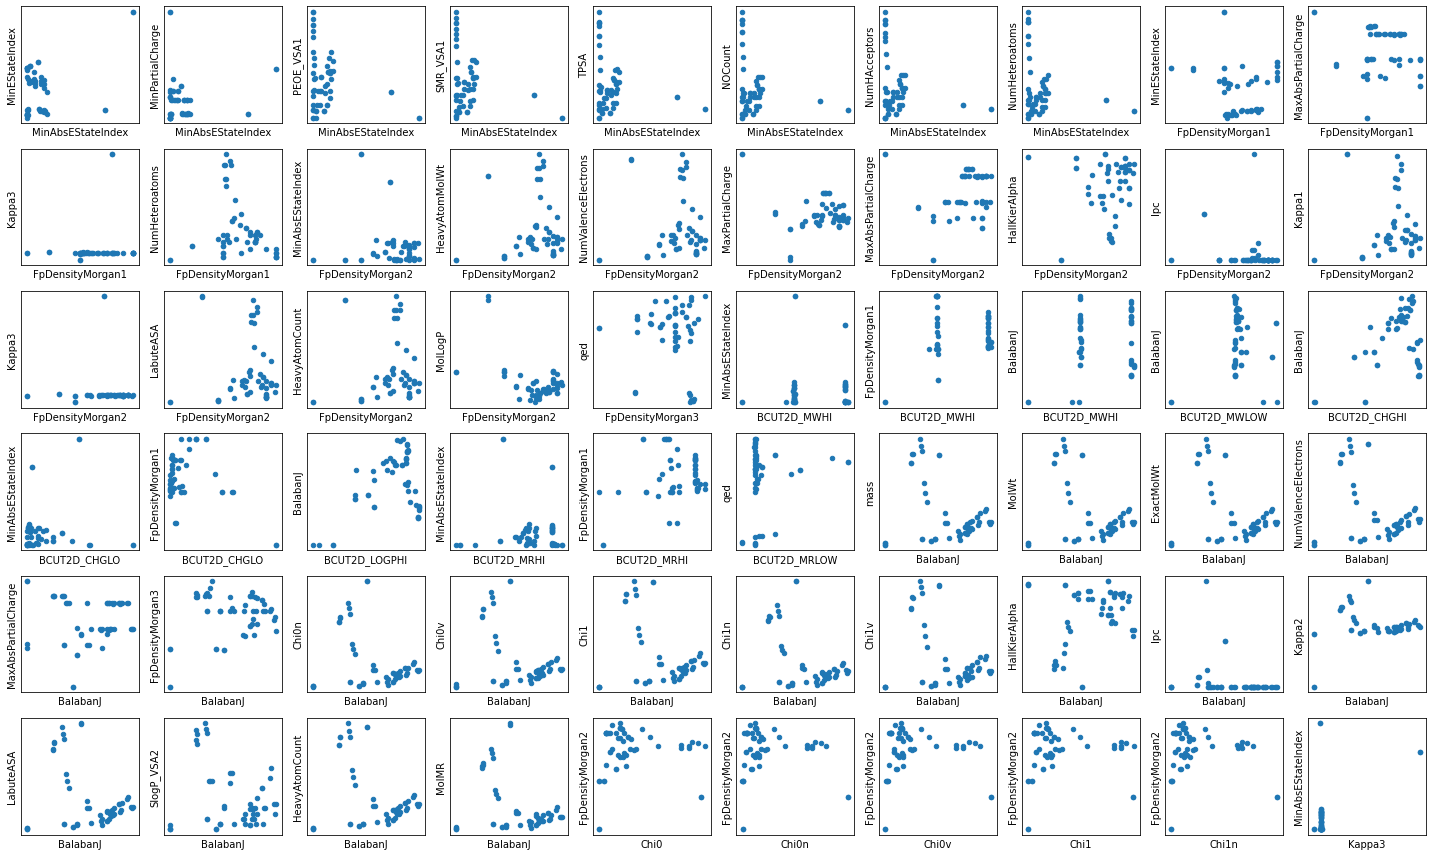

In [16]:
f, axs = plt.subplots(6, 10, figsize=(20, 12))
axs = axs.flatten()

for i in range(60):
    dfCore.plot.scatter(lowest.iloc[i,0], lowest.iloc[i,1], ax=axs[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    
f.tight_layout()

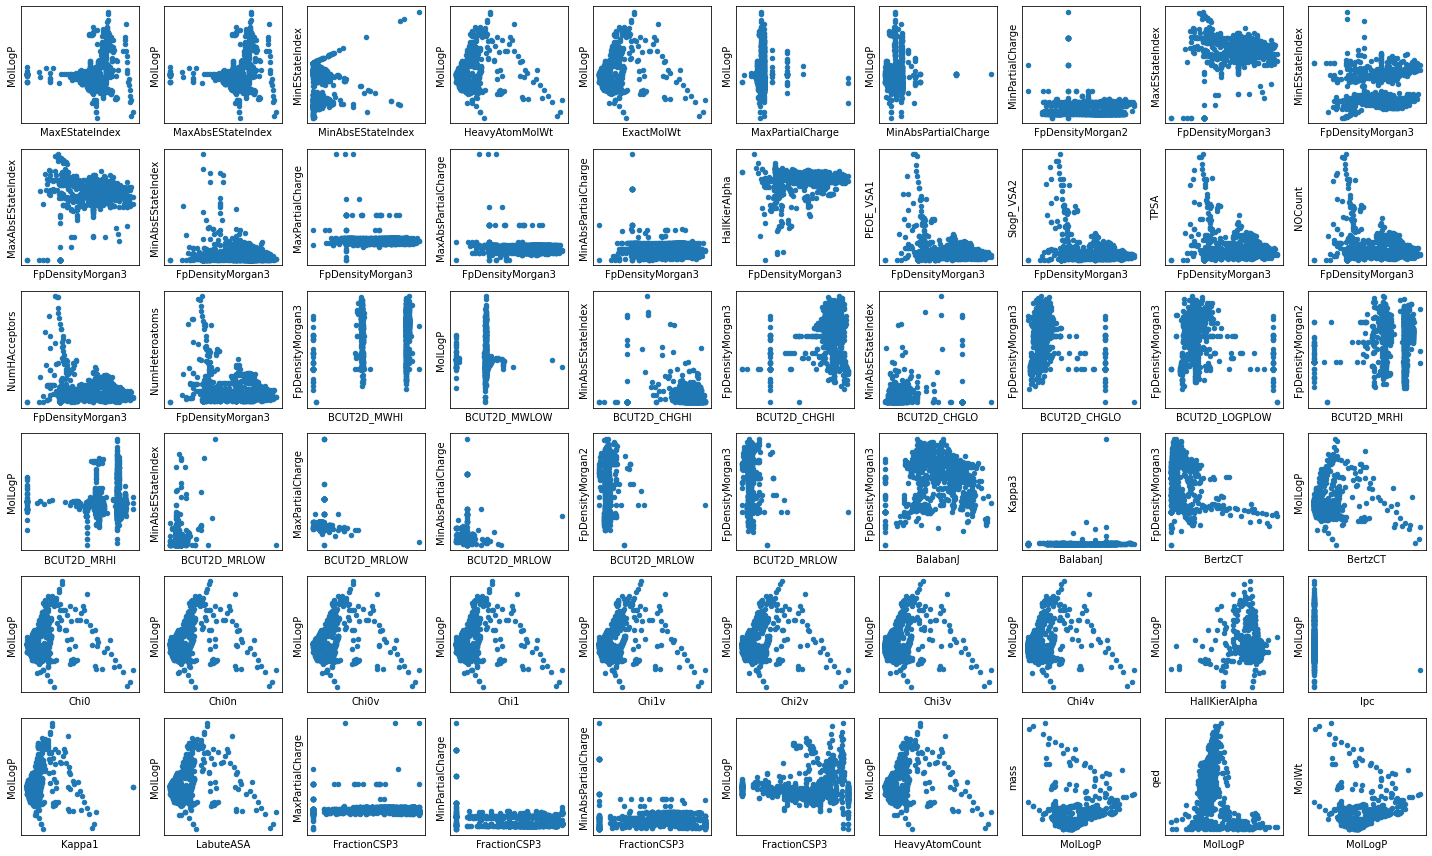

In [17]:
f, axs = plt.subplots(6, 10, figsize=(20, 12))
axs = axs.flatten()

for i in range(60):
    df1515.plot.scatter(lowest_1515.iloc[i,0], lowest_1515.iloc[i,1], ax=axs[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    
f.tight_layout()

In [18]:
import pyvis as pv
from pyvis.network import Network
import networkx as nx
from tqdm.auto import tqdm
from matplotlib import cm, colors
from IPython.display import IFrame

In [19]:
net = Network(height ="750px", width ="100%", bgcolor="#222222", font_color= "white")
net.barnes_hut()


In [20]:
dfCorr = df1515_3.corr()

In [21]:
# edges = pd

### Stuff

In [22]:
from pyvis.network import Network
import pandas as pd

got_net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')

# set the physics layout of the network
got_net.barnes_hut(overlap = 0.9)
got_data = pd.read_csv('https://www.macalester.edu/~abeverid/data/stormofswords.csv')

sources = got_data['Source']
targets = got_data['Target']
weights = got_data['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

got_net.toggle_physics(False)
got_net.show_buttons(filter_=['physics'])
got_net.show('gameofthrones.html')

## Pyvis stuff

In [23]:
from pyvis.network import Network
import pandas as pd

net2 = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')

# set the physics layout of the network
net2.barnes_hut(gravity=-80000, central_gravity=0.3, spring_length=250, spring_strength=0.001, damping=0.09, overlap=0)
data = df1515_2

sources = data["d1_1515"]
targets = data['d2_1515']
weights = data['value1515']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    net2.add_node(src, src, title=src)
    net2.add_node(dst, dst, title=dst)
    net2.add_edge(src, dst, value=w)

neighbor_map = net2.get_adj_list()

# add neighbor data to node hover data
for node in net2.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

net2.toggle_physics(False)
net2.show_buttons(filter_=['physics'])
net2.show('Metabolic_network.html')


# NetworkX & removal of self-loops

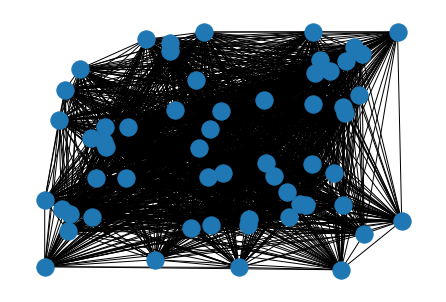

In [24]:
import networkx as nx
import numpy as np


net3 = nx.Graph()
net3 = nx.from_pandas_edgelist(df1515_2, source ="d1_1515", target = "d2_1515", edge_attr = "value1515")

#Remove self loops
net3.remove_edges_from(nx.selfloop_edges(net3))

nx.draw_random(net3)

NameError: name 'nx_Graph' is not defined

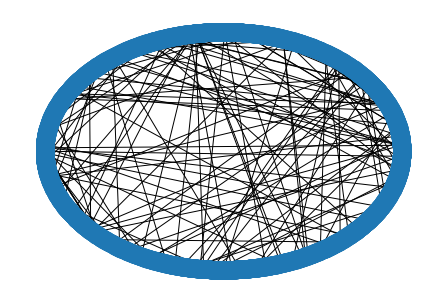

In [25]:
import networkx as nx
import numpy as np
from pyvis.network import Network
# import pyvis.network as nt

# The network source is just
net4 = nx.Graph()
net4 = nx.from_pandas_edgelist(dfNetwork, source ="#ID", target = "mass", edge_attr = True)

net4.remove_edges_from(nx.selfloop_edges(net4))

nx.draw_circular(net4)

Network.from_nx
Network.from_nx(nx_Graph())
Network.show('nx.html')

# Adding nodes with attributes
- 1. One approach is to create lists from columns from each dataframe and then parse them as values in the script below
   - haha fml pyvis does not support df's, lists or series 🪦🪦🪦🪦🪦🪦

- 2. Create the network in networkX and import it to pyvis via from_nx

   ```python
      import networkx as nx
      import pyvis.network as network

      nx_graph = nx.cycle_graph(10)
      
      network.from_nx(nx_graph)
    ```
   


# NetworkX prepping before pyvis

In [ ]:
from pyvis.network import Network
import networkx as nx
nx_graph = nx.cycle_graph(120)
nx_graph.nodes[1]['title'] = 'Number 1'
nx_graph.nodes[1]['group'] = 1
nx_graph.nodes[3]['title'] = 'I belong to a different group!'
nx_graph.nodes[3]['group'] = 10
nx_graph.add_node(20, size=20, title='couple', group=2)
nx_graph.add_node(21, size=15, title='couple', group=2)
nx_graph.add_edge(20, 21, weight=5)
nx_graph.add_node(25, size=25, label='lonely', title='lonely node', group=3)
nt = Network('500px', '500px')
# populates the nodes and edges data structures
Testing = nt.from_nx(nx_graph)
nt.show('nx.html')

In [ ]:
Testing.

# Don't open 

In [ ]:
f = Network()
f.add_nodes([got_source_string], value=[got_weight_int],
 title=[got_target_string])


f.show("lol.html")

TypeError: unhashable type: 'Series'

In [ ]:
g = Network()
g.add_nodes([1,2,3], value=[10, 100, 400],
                         title=['I am node 1', 'node 2 here', 'and im node 3'],
                         x=[21.4, 100, 0.0],
                         y=[100.2, 23.54, 0.0],
                         label=['NODE 1', 'NODE 2', 'NODE 3'],
                         color=['#00ff1e', '#162347', '#dd4b39'])


g.show("lol.html")

TypeError: 'str' object is not callable

In [ ]:
import pandas as pd
got_data = pd.read_csv('https://www.macalester.edu/~abeverid/data/stormofswords.csv')

got_Source = got_data["Source"].tolist()
got_Target = got_data["Target"].tolist()
got_Weights = got_data["Weight"].tolist()

got_source_string = got_data["Source"].astype(str)
got_target_string = got_data["Target"].astype(str)
got_weight_int = got_data["Weight"].astype(int)

In [26]:
df1515_2.to_csv("ViztestData.csv")

In [37]:
import os

outname = "SaveLocTest.csv"

outdir = "./data"
if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir, outname)

print(fullname)

df1515_2.to_csv(fullname)
# df1515_2.to_csv("C:\Users\ViztestData.csv") 

./data\SaveLocTest.csv


In [2]:
import pyggplot
from dautil import data

ModuleNotFoundError: No module named 'dautil'

In [3]:
import plotly.express as px
from sklearn.decomposition import PCA

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df["species"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [4]:
print(features)

['sepal_width', 'sepal_length', 'petal_width', 'petal_length']
